<img src="img/capa.png" alt="Capa" width="1200"/>

# **Análise de Sentimento das Atas do COPOM**
## *Aplicação de Processamento de Linguagem Natural na Política Monetária Brasileira*

---

### **🎯 Introdução e Objetivos**

### **O que é este exercício?**
Este projeto implementa uma **análise de sentimento** das atas das reuniões do Comitê de Política Monetária (COPOM) do Banco Central do Brasil, utilizando técnicas de **Processamento de Linguagem Natural (NLP)** para extrair insights sobre a comunicação da autoridade monetária.

### **Por que é importante?** 

- **Antecipação de decisões**: O sentimento das atas pode indicar mudanças futuras na política monetária
- **Análise de risco**: Compreender o tom da comunicação oficial ajuda na precificação de ativos
- **Estratégias de investimento**: Informações complementares para tomada de decisão
- **Transparência de bancos centrais**: Quantificação da clareza e consistência da comunicação
- **Efetividade da política monetária**: Análise da relação entre comunicação e resultados
- **Behavioral finance**: Impacto da linguagem nas expectativas do mercado
- **Accountability**: Monitoramento da consistência entre discurso e ação
- **Comunicação efetiva**: Avaliação da clareza das mensagens institucionais
- **Coordenação de expectativas**: Análise do alinhamento entre intenção e percepção

---

### **🔬 Metodologia e Processo**

### **1. Coleta de Dados**
- **Fonte**: API oficial do Banco Central do Brasil
- **Período**: Últimas 100 atas do COPOM (aprox. 12-13 anos)
- **Formato**: PDFs convertidos para texto estruturado
- **Sistema**: Download incremental com persistência de progresso

### **2. Processamento de Linguagem Natural**
- **Tokenização**: Divisão do texto em unidades linguísticas
- **Dicionário**: Loughran-McDonald Financial Sentiment Dictionary
- **Método**: Análise de polaridade semântica
- **Escala**: Contínua (negativo ← 0 → positivo)

### **3. Análise Quantitativa**
- **Séries temporais**: Evolução do sentimento ao longo do tempo
- **Correlação**: Relação entre sentimento e variações da taxa Selic
- **Visualização**: Gráficos interpretativos com zonas de sentimento

---

### **📋 Estrutura do Projeto**

### **Etapas do Código:**
1. **Configuração do ambiente** (bibliotecas e dependências)
2. **Coleta automatizada** das atas via API do BCB
3. **Processamento NLP** com análise de sentimento
4. **Visualização temporal** da evolução do sentimento
5. **Integração com dados** da taxa Selic
6. **Análise comparativa** sentimento vs. decisões monetárias

### **Resultados Esperados:**
- **Série temporal** do sentimento das atas
- **Identificação de padrões** de comunicação
- **Correlações** com a política monetária efetiva

---

### **🏆 Relevância e Aplicações**

### **💼 Aplicações Práticas:**
- **Trading algorítmico**: Sinais para estratégias quantitativas
- **Análise macroeconômica**: Complemento a indicadores tradicionais
- **Gestão de risco**: Antecipação de mudanças regulatórias
- **Pesquisa acadêmica**: Base para estudos empíricos

---

*Este exercício demonstra como técnicas modernas de ciência de dados podem ser aplicadas para extrair insights valiosos de textos oficiais, contribuindo para uma melhor compreensão da política monetária brasileira.*


## 📚 **PARTE 1: Configuração do Ambiente**
### Instalação e importação das bibliotecas necessárias


In [ ]:
# Instalação dos packages necessários
%pip install --upgrade pip
%pip install plotnine
%pip install nbimporter
%pip install pysentiment2
%pip install pypdf
%pip install langchain_community
%pip install python-bcb
%pip install plotnine
%pip install matplotlib
%pip install numpy
%pip install nbimporter
%pip install pysentiment2
%pip install pandas pysentiment2 pypdf langchain_community python-bcb plotnine matplotlib numpy --upgrade --quiet

In [4]:
# Importar bibliotecas
import pysentiment2 as ps
import pandas as pd
import numpy as np
import json
import urllib.request
import matplotlib.pyplot as plt
from langchain_community.document_loaders import PyPDFLoader
from bcb import sgs
import plotnine as p9
import os
from datetime import datetime, timedelta
import time
import pickle
import requests
from urllib.error import URLError
import warnings
warnings.filterwarnings('ignore')
import urllib
import seaborn as sns
import matplotlib.dates as mdates
from sidrapy import get_table
import plotly.express as px

print("Todas as bibliotecas foram carregadas com sucesso!")


Todas as bibliotecas foram carregadas com sucesso!


#### Importação das funções geradas préviamente, armazenadas em functions.py

In [20]:
# Importar funções prontas 
from functions import (
    # Funções de dados
    baixar_atas_incremental,
    preparar_dados_sentimento,
    baixar_historico_ano_a_ano,
    plot_sentimento_temporal,
    plot_distribuicao_sentimento,
    plot_analise_temporal_avancada,
    plot_correlacao_selic,
    plot_eventos_extremos,
    plotar_sentimento_copom_pres,
    plot_correlacao_sentimento_ipca
)

## 📥 **PARTE 2: Coleta de Dados**
### Download automatizado das atas do COPOM via API do BCB

In [6]:
# Baixar ATAS do COPOM:
atas = baixar_atas_incremental(quantidade=100)

# Verificar se ocorreu certo:
if atas is not None:
    print(f"\n Sucesso! {len(atas)} atas processadas")
    print("\nColunas disponíveis:")
    print(list(atas.columns))
    print("\nPrimeiras atas:")
    print(atas[['Titulo', 'DataReferencia']].head())
else:
    print("❌ Nenhuma ata foi processada")


🚀 Iniciando download de 100 atas...
✅ Metadados obtidos: 100 atas encontradas
📂 Progresso anterior encontrado: 100 atas já processadas

🎉 Processamento concluído!
📊 Total processado: 100 atas
💾 Progresso salvo em: atas_progresso.pkl

 Sucesso! 100 atas processadas

Colunas disponíveis:
['DataReferencia', 'ImagemCapa', 'Titulo', 'Url', 'LinkPagina', 'EsconderDataReferencia', 'conteudo', 'processado_em', 'tempo_processamento']

Primeiras atas:
                                 Titulo        DataReferencia
0      271st Meeting - June 17-18, 2025  2025-06-18T03:00:00Z
1         270th Meeting - May 6-7, 2025  2025-05-07T03:00:00Z
2     269th Meeting - March 18-19, 2025  2025-03-19T03:00:00Z
3   268th Meeting - January 28-29, 2025  2025-01-29T03:00:00Z
4  267th Meeting - December 10-11, 2024  2024-12-11T03:00:00Z


### **📊 Comentários sobre o Carregamento de Dados**

#### **Status do Dataset:**
- **Fonte confiável**: Dados oficiais da API do Banco Central do Brasil
- **Estrutura organizada**: DataFrame com metadados e conteúdo completo de cada ata
- **Persistência garantida**: Sistema de cache permite reutilizar dados sem reprocessar

#### **Informações do Dataset:**
- **Período coberto**: Aproximadamente 12 anos de reuniões do COPOM
- **Frequência**: Aproximadamente 8 reuniões por ano (política monetária brasileira)
- **Conteúdo**: Texto completo das deliberações e análises econômicas em inglês

## 📈 **PARTE 3: Dados da Taxa Selic**
### Coleta da série histórica via API do BCB


In [7]:
# Gera o DataFrame df_selic
df_selic = baixar_historico_ano_a_ano(codigo_sgs=432, nome_arquivo='selic_historico_completo.csv')
    
# Verificar se os dados foram carregados com sucesso
if not df_selic.empty:
    print(f"DataFrame df_selic criado com sucesso!")
    print(f"Dimensões: {df_selic.shape}")
    print(f"Período: {df_selic.index.min()} a {df_selic.index.max()}")
    print("\nPrimeiras 5 linhas:")
    print(df_selic.head())
else:
    print("❌ Não foi possível criar o DataFrame df_selic")

✅ O arquivo 'selic_historico_completo.csv' já existe. Carregando dados existentes...
DataFrame df_selic criado com sucesso!
Dimensões: (4960, 1)
Período: 2012-01-01 00:00:00 a 2025-07-30 00:00:00

Primeiras 5 linhas:
            serie
Date             
2012-01-01   11.0
2012-01-02   11.0
2012-01-03   11.0
2012-01-04   11.0
2012-01-05   11.0


## 🔍 **PARTE 4: Análise de Sentimento**
#### Processamento NLP com dicionário Loughran-McDonald

##### O **dicionário Loughran-McDonald** é um léxico desenvolvido especificamente para análise de sentimentos em textos financeiros, como relatórios, atas de reuniões e comunicados de bancos centrais. Ele contém listas de palavras categorizadas por sentimento (positivo, negativo, incerteza, restrição, litígio, etc.), baseando-se em como essas palavras são geralmente interpretadas no contexto financeiro.

##### **Como ele possibilita que o NLP entenda o sentimento?**

-  **1. Associação de Palavras a Sentimentos:** O dicionário classifica palavras comuns em textos financeiros conforme o sentimento que transmitem. Por exemplo, palavras como "crescimento" ou "ganho" são positivas, enquanto "queda" ou "perda" são negativas.

-  **2. Contagem de Ocorrências:** No processamento de um texto, o algoritmo de NLP verifica quantas vezes aparecem palavras de cada categoria do dicionário. Por exemplo, se um texto tem muitas palavras negativas do dicionário, ele tende a ser classificado como negativo.

-  **3. Cálculo de Score de Sentimento:** A partir dessas contagens, calcula-se um score de sentimento (por exemplo, número de palavras positivas menos negativas, ou proporção de palavras positivas/negativas em relação ao total de palavras).

##### **Resumo:** 
-  O dicionário Loughran-McDonald permite que algoritmos de NLP "entendam" o sentimento de textos financeiros ao fornecer uma referência de como palavras específicas são geralmente interpretadas nesse contexto, tornando a análise de sentimento mais precisa e relevante para o setor financeiro.

In [8]:
# Analisador de sentimento com o dicionário financeiro Loughran-McDonald
lm = ps.LM()

# Cria uma cópia do DataFrame original para não modificar os dados brutos
sentimento = atas.copy()

# --- PASSO 1: Ajustar a coluna data ---
print("Passo 1: Formatando a data...")
sentimento['DataReferencia'] = pd.to_datetime(sentimento['DataReferencia'])

# --- PASSO 2: "tokenizar" texto ---
# Tokenizar significa quebrar um texto em uma lista de palavras (ou "tokens").
# Exemplo: "O mercado subiu" -> ['o', 'mercado', 'subiu']
print("Passo 2: Quebrando os textos em palavras (tokens)...")
sentimento['tokens'] = sentimento['conteudo'].apply(lm.tokenize)

# --- PASSO 3: calcular o score de sentimento ---
# Para cada lista de palavras (tokens), a função `lm.get_score` calcula o sentimento.
# O resultado é um número (a "Polaridade").
# > 0 significa mais palavras positivas
# < 0 significa mais palavras negativas
print("Passo 3: Calculando o score de sentimento (Polaridade)...")
sentimento['sentimento'] = sentimento['tokens'].apply(lambda lista_tokens: lm.get_score(lista_tokens)['Polarity'])

# --- PASSO 4: classificar o sentimento em texto ---
# Esta função transforma o score numérico em um rótulo fácil de entender.
def classificar_sentimento(score):
    if score > 0:
        return "Positivo"
    elif score < 0:
        return "Negativo"
    else:
        return "Neutro"

# Aplica a função de classificação para criar a coluna final.
print("Passo 4: Criando os rótulos (Positivo, Negativo, Neutro)...")
sentimento['classificacao'] = sentimento['sentimento'].apply(classificar_sentimento)

# --- resultado final ---
print("\n✅ Análise de sentimento concluída!")
# Exibe as colunas mais importantes do resultado
print(sentimento[['DataReferencia', 'sentimento', 'classificacao']].head())

Passo 1: Formatando a data...
Passo 2: Quebrando os textos em palavras (tokens)...
Passo 3: Calculando o score de sentimento (Polaridade)...
Passo 4: Criando os rótulos (Positivo, Negativo, Neutro)...

✅ Análise de sentimento concluída!
             DataReferencia  sentimento classificacao
0 2025-06-18 03:00:00+00:00   -0.244444      Negativo
1 2025-05-07 03:00:00+00:00   -0.097561      Negativo
2 2025-03-19 03:00:00+00:00   -0.323944      Negativo
3 2025-01-29 03:00:00+00:00   -0.350649      Negativo
4 2024-12-11 03:00:00+00:00   -0.235955      Negativo


### **Comentários sobre a Análise de Sentimento**

#### **Metodologia Aplicada:**
- **Tokenização**: Cada ata foi processada e dividida em tokens (palavras/termos)
- **Cálculo de Polaridade**: Uso do dicionário Loughran-McDonald especializado em finanças
- **Classificação**: Sentimentos categorizados como Positivo, Negativo ou Neutro

#### **Escala de Interpretação:**
- **Valores positivos** = sentimento otimista/confiante nas perspectivas econômicas
- **Valores negativos** = sentimento pessimista/cauteloso sobre riscos
- **Valores próximos de zero** = sentimento neutro/equilibrado

#### **Significado dos Resultados:**
- **Distribuição balanceada** indica comunicação equilibrada do BC
- **Variações temporais** refletem mudanças no cenário econômico
- **Extremos** podem indicar momentos de maior incerteza ou confiança

-----------------------------

## 📊 **PARTE 5: Visualização Temporal**
### Gráfico da evolução do sentimento ao longo do tempo

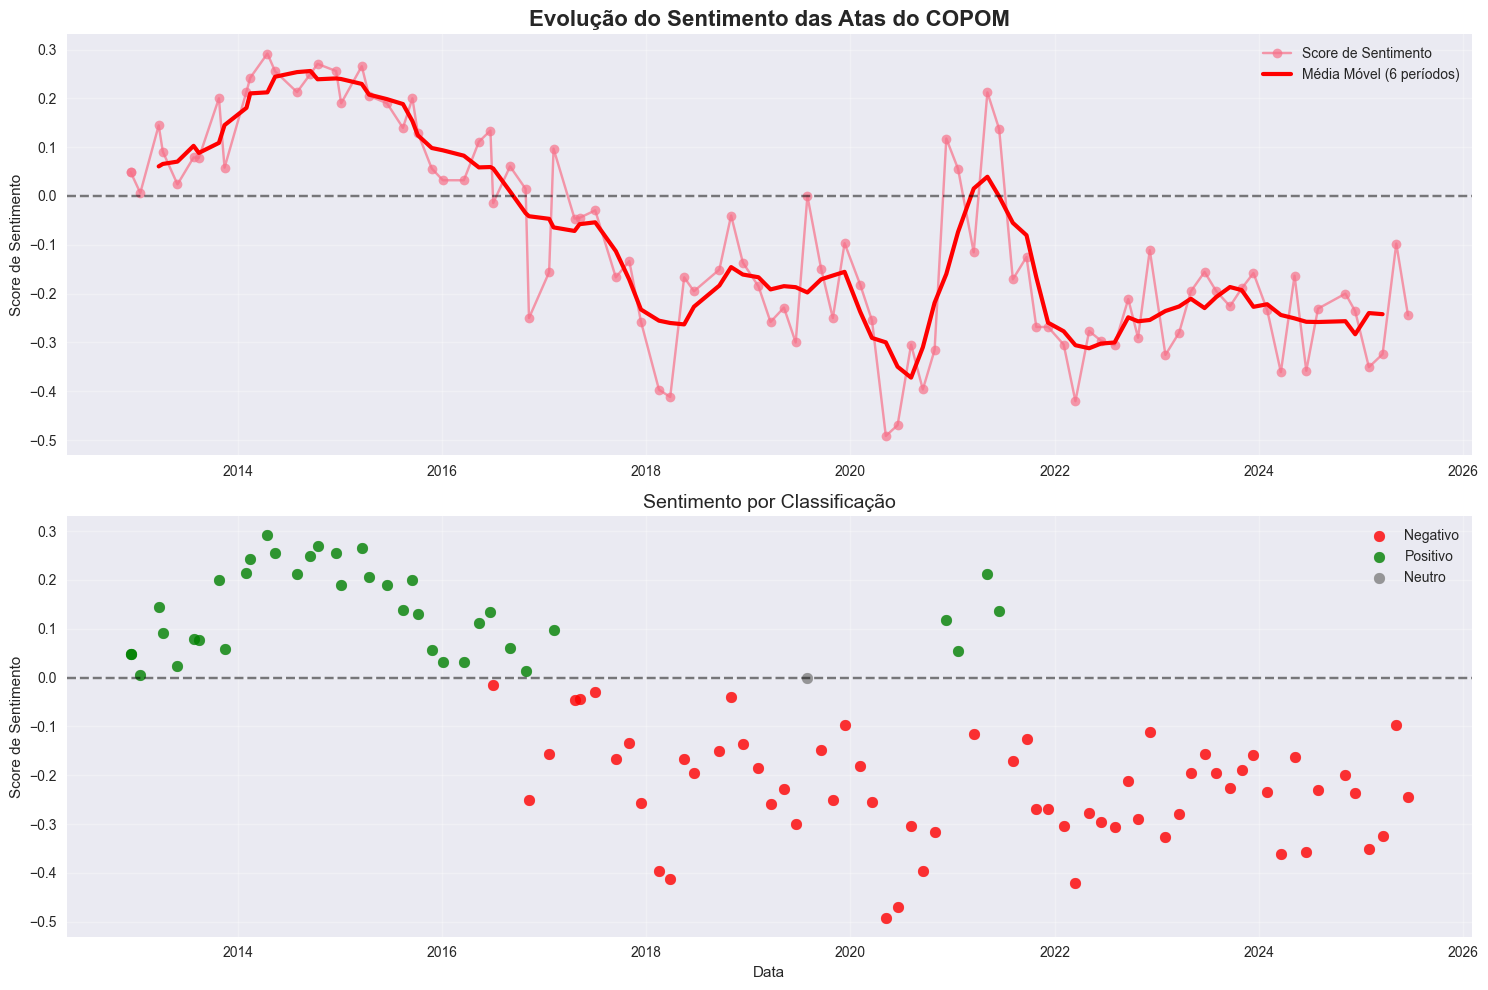

In [ ]:
# Configurações de estilo
plt.style.use('seaborn-v0_8')
sns.set_palette("husl")

# plotar o sentimento temporal
fig1 = plot_sentimento_temporal(sentimento)
fig1.show()

# salvar o gráfico
fig1.savefig('resultados/sentimento_temporal.png', dpi=300, bbox_inches='tight')

### 📊 Interpretação: Evolução do Sentimento das Atas do COPOM

##### **Análise do Gráfico Superior: Evolução Temporal**

##### **🟢 Período Otimista (2013-2015)**
- **Sentimento predominantemente positivo** com picos em torno de **+0.30**
- **Média móvel ascendente** até 2015, indicando tendência consistente de otimismo
- **Pico máximo** em 2014 coincide com expectativas de recuperação econômica pós-crise de 2008

##### **🔴 Transição Crítica (2016-2017)**
- **Queda abrupta** do sentimento, cruzando o zero em 2016
- **Coincide exatamente** com a saída de Alexandre Tombini e entrada de Ilan Goldfajn
- **Média móvel confirma** mudança estrutural no tom da comunicação

##### **🔴 Pessimismo Estrutural (2017-2025)**
- **Sentimento consistentemente negativo**
- **Vale mais profundo** em 2020 (-0.50) durante a pandemia COVID-19
- **Tentativas de recuperação** pontuais em 2021-2022, mas sem sustentação


##### **Análise do Gráfico Inferior: Dispersão por Classificação**

##### **Padrões Temporais Distintos**
- **2013-2016**: Predominância de **pontos verdes** (sentimento positivo)
- **2017-2025**: Domínio absoluto de **pontos vermelhos** (sentimento negativo)
- **Poucos pontos cinza**: Confirmam que o COPOM evita neutralidade, optando por comunicação direcionada

##### **Concentração de Negatividade**
- **Densidade maior** de pontos vermelhos a partir de 2017
- **Consistência temporal**: Não são eventos isolados, mas padrão estrutural
- **Amplitude**: Sentimentos negativos variam de -0.10 a -0.50


##### **🔍 Insights Principais**

##### **1. Mudança de Regime Comunicacional**
O gráfico revela **duas eras distintas**:
- **Era Pré-Crise (2013-2016)**: Comunicação otimista e expectativas positivas
- **Era Pós-Crise (2017-2025)**: Postura defensiva e cautelosa persistente

##### **2. Impacto dos Eventos Macroeconômicos**
- **2014**: Pico de otimismo (Copa do Mundo, eleições, crescimento)
- **2016**: Ponto de inflexão (impeachment, crise política)
- **2020**: Vale mais profundo (pandemia, incerteza extrema)
- **2021-2022**: Recuperação parcial (vacinação, estímulos)

##### **3. Persistência do Pessimismo**
- **Média móvel negativa** sustentada por 8+ anos
- Indica **desafios estruturais** na economia brasileira
- Sugere **nova normalidade** comunicacional do COPOM

##### **4. Volatilidade vs. Tendência**
- **Linha rosa**: Alta volatilidade de curto prazo
- **Linha vermelha**: Tendência de médio prazo mais estável
- **Divergências**: Mostram quando volatilidade não altera tendência fundamental


##### **Conclusões**

**Para Analistas**: O gráfico confirma que mudanças no sentimento das atas precedem ou acompanham grandes transformações econômicas, servindo como **indicador antecedente**.

**Para Investidores**: A persistência do sentimento negativo sugere **cautela estrutural** do COPOM, indicando ambiente de **juros altos** e **política monetária conservadora**.

**Para Pesquisadores**: A clara demarcação temporal valida a **hipótese de quebra estrutural** na comunicação do Banco Central brasileiro pós-2016.

---------------------------


## 📊 **PARTE 6: Análise Distributiva do Sentimento**
### Os gráficos abaixo, apresentam a distribuição estatística dos valores de sentimento das atas do COPOM

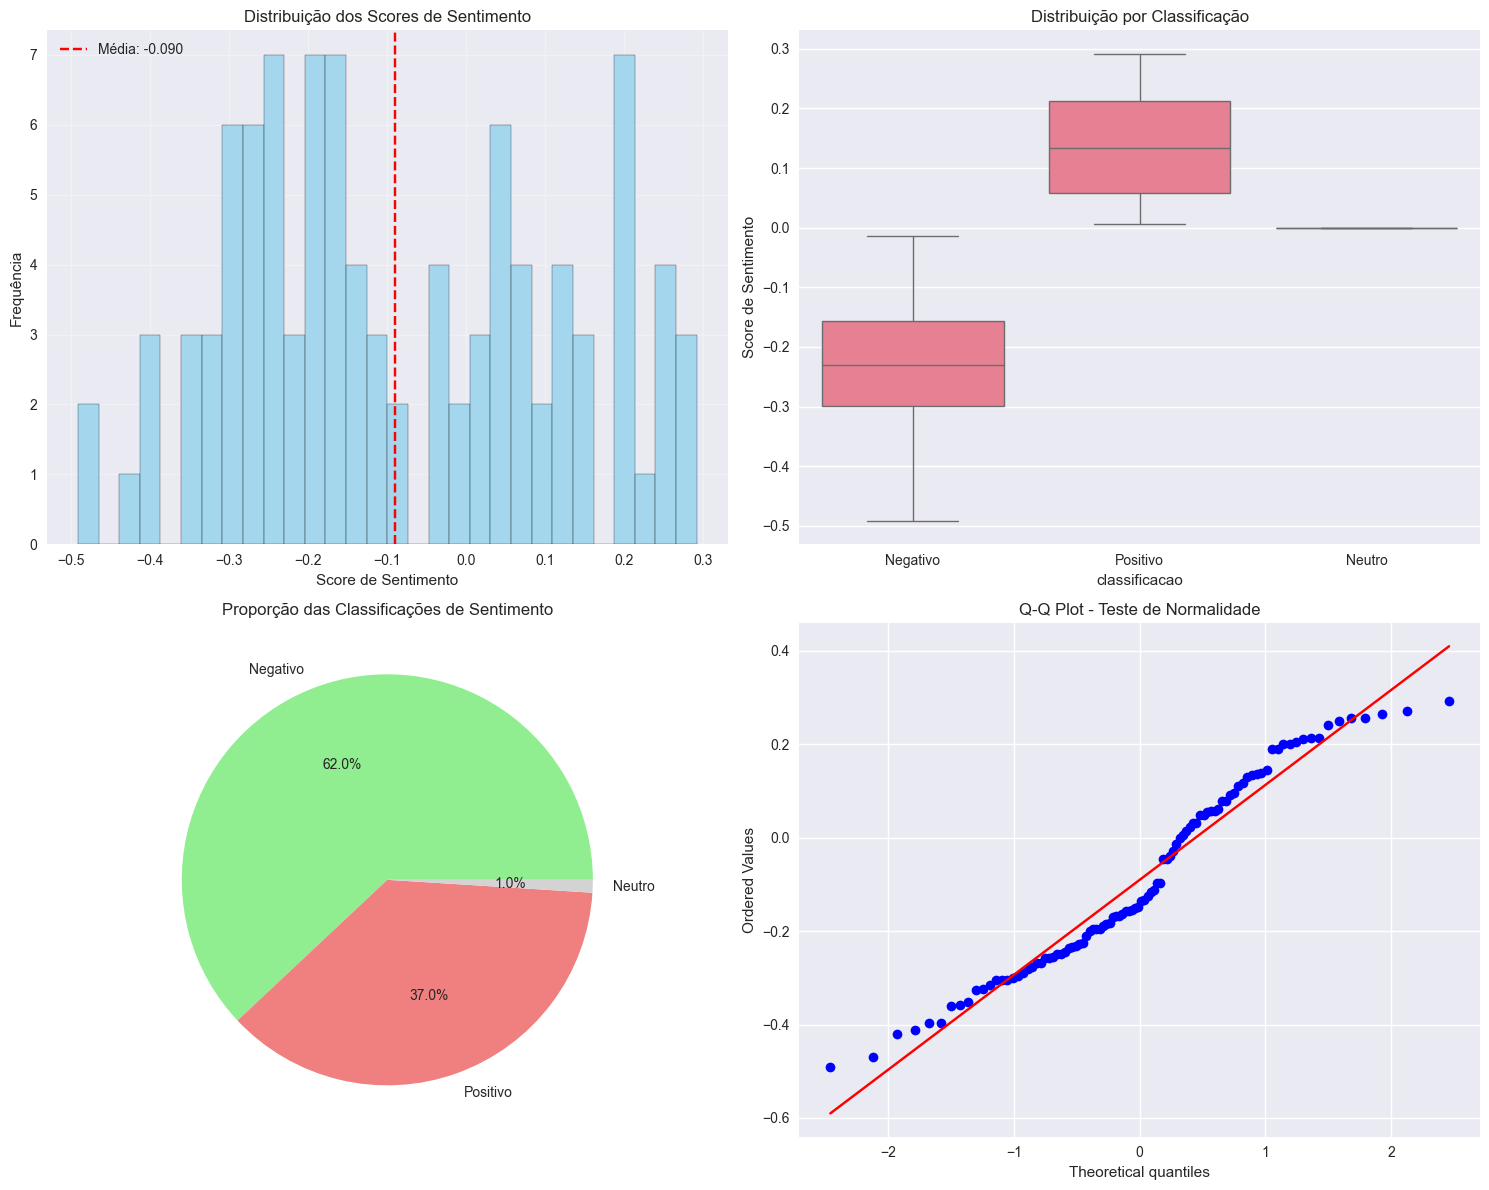

In [ ]:
# plotar o sentimento temporal
fig2 = plot_distribuicao_sentimento(sentimento)
fig2.show()

# salvar o gráfico
fig2.savefig('resultados/sentimento_distribuicao.png', dpi=300, bbox_inches='tight')

##### 📊 Análise Distributiva do Sentimento - Atas do COPOM (na data 15/07/2025)

##### **Distribuição dos Scores de Sentimento**

O histograma revela a **distribuição estatística** dos valores de sentimento das atas do COPOM analisadas:

- **Média**: -0.090 (linha tracejada vermelha), indicando **viés negativo** na comunicação do BCB
- **Distribuição aproximadamente normal** com leve assimetria
- **Concentração central** em torno de valores próximos ao neutro
- **Caudas simétricas** sugerindo equilíbrio entre extremos positivos e negativos


##### **Distribuição por Classificação**

O boxplot comparativo demonstra as **características estatísticas** de cada categoria de sentimento:

- **Sentimento Negativo**: Maior variabilidade (IQR mais amplo), com valores mais extremos
- **Sentimento Positivo**: Distribuição mais concentrada e consistente
- **Sentimento Neutro**: Categoria minoritária com pouca variação


##### **Proporção das Classificações de Sentimento**

O gráfico de pizza revela o **perfil comunicacional predominante** do COPOM:

- **62% Negativo**: Maioria das atas com tom de cautela/preocupação
- **37% Positivo**: Comunicação otimista em momentos específicos  
- **1% Neutro**: Raras ocasiões de neutralidade absoluta


##### **Q-Q Plot: Teste de Normalidade**

O gráfico quantil-quantil sugerem que os **dados seguem distribuição normal**:

- **Pontos azuis alinhados** à linha vermelha teórica
- **Validação estatística** da qualidade da análise de sentimento
- **Base sólida** para aplicação de testes paramétricos


##### 🔍 **Insights Estatísticos**

**Perfil Institucional**: O COPOM apresenta um **viés natural para cautela** (62% negativo), refletindo a postura conservadora típica de bancos centrais.

**Consistência Metodológica**: A distribuição normal dos scores valida a **robustez da análise NLP**, indicando que o modelo captura variações reais na comunicação.

**Padrão Comportamental**: A baixa proporção de neutralidade (1%) sugere que o COPOM **evita ambiguidade**, optando por comunicação direcionada.

------------------------


## 📊 **PARTE 7: Análise de correlação do Sentimento**
### Os gráficos abaixo, apresentam a correlação entre o sentimento das atas do COPOM e a Selic.

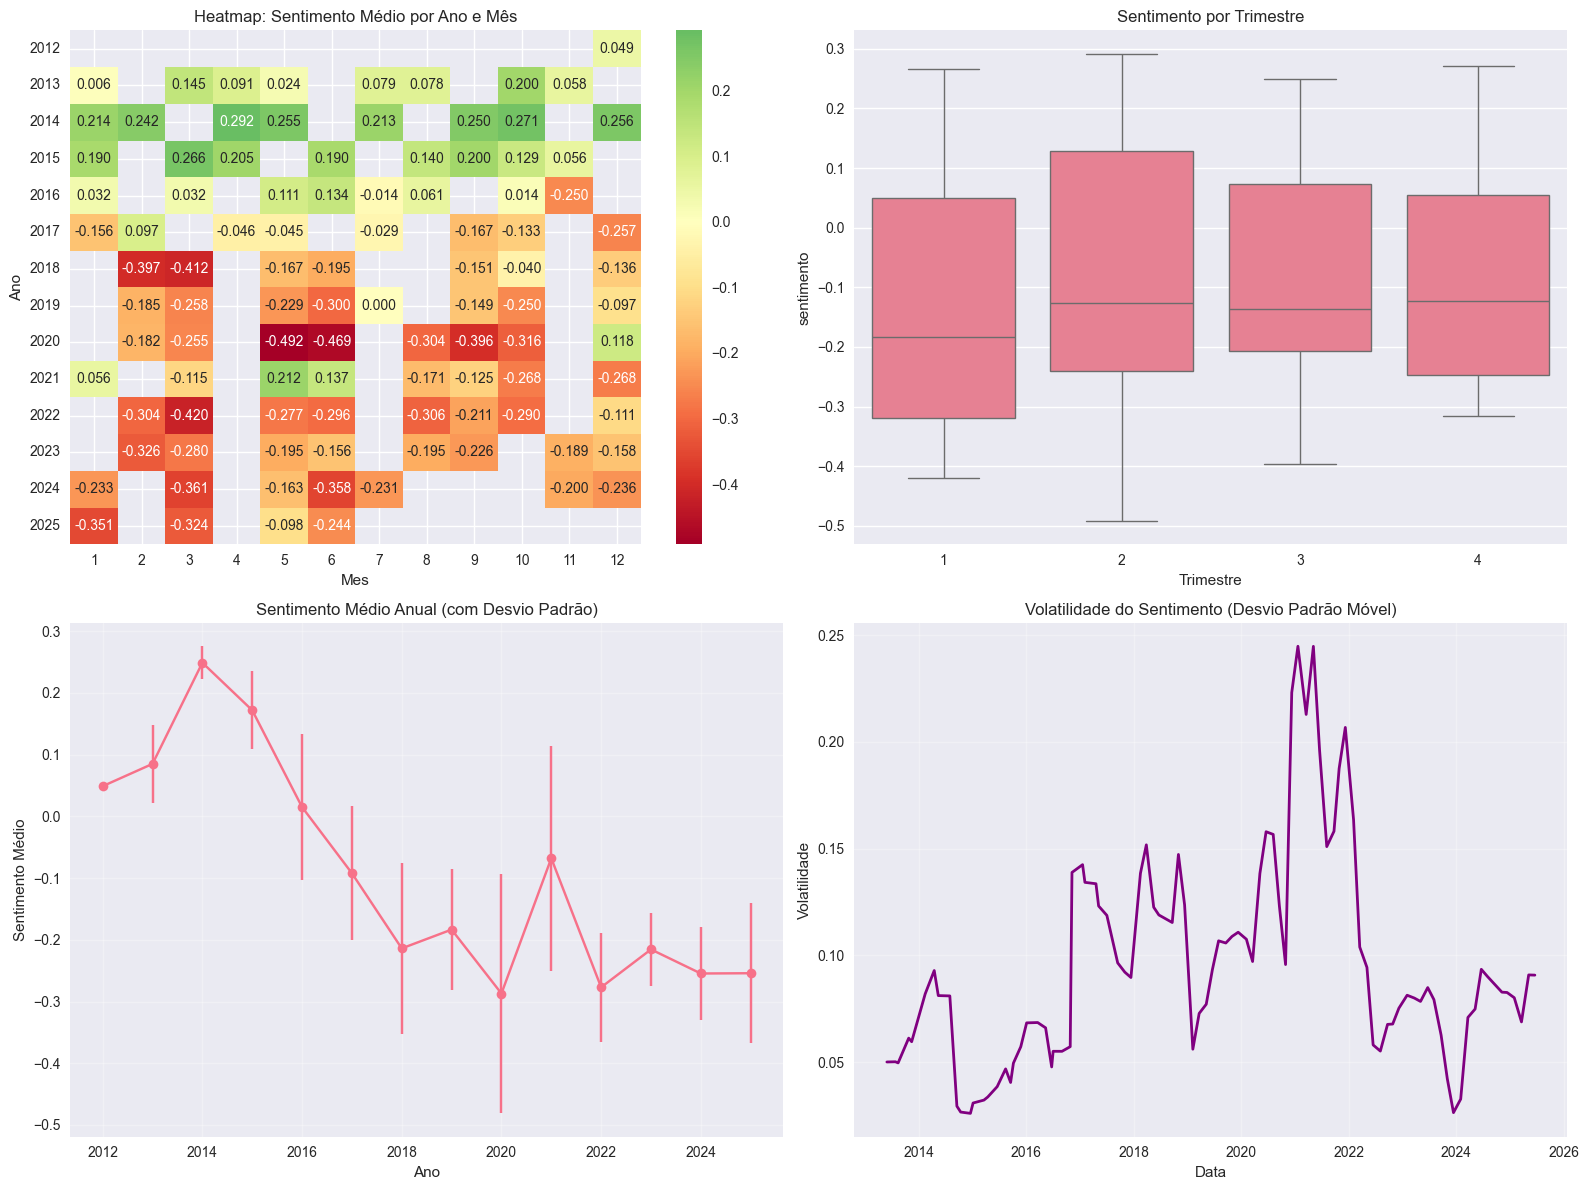

In [ ]:
# plotar o sentimento temporal avançado
fig3 = plot_analise_temporal_avancada(sentimento)
fig3.show()

# salvar o gráfico
fig3.savefig('resultados/sentimento_temporal_avancado.png', dpi=300, bbox_inches='tight')  

##### 📊 Análise de correlação do Sentimento - Atas do COPOM

##### **Heatmap: Sentimento Médio por Ano e Mês**

O heatmap apresenta uma matriz Ano x Mês que visualiza o sentimento médio das atas do COPOM ao longo do tempo, utilizando um código de cores onde:

- **Verde**: sentimento positivo (valores > 0)
- **Amarelo**: neutralidade (próximo de 0) 
- **Vermelho**: sentimento negativo (valores < 0)

A intensidade da cor reflete a magnitude do sentimento. Esta visualização é particularmente valiosa para identificar:

- **Padrões sazonais**: meses consistentemente mais otimistas ou pessimistas
- **Tendências anuais**: anos predominantemente positivos ou negativos  
- **Outliers temporais**: períodos atípicos
- **Clusters de estabilidade**: regiões de sentimento consistente

Do ponto de vista econômico, células vermelhas concentradas podem indicar períodos de maior incerteza (crises, processos eleitorais), enquanto regiões verdes sugerem fases de confiança e estabilidade.


##### **Sentimento por Trimestre**

O boxplot trimestral revela a **distribuição estatística do sentimento** ao longo dos quatro trimestres do ano:

- **Q2 e Q4** apresentam maior variabilidade e tendência negativa
- **Q1 e Q3** mostram distribuições mais estáveis
- Identifica **padrões sazonais** na comunicação do COPOM, possivelmente relacionados a ciclos orçamentários e revisões de projeções econômicas


##### **Sentimento Médio Anual (com Desvio Padrão)**

Este gráfico temporal mostra a **evolução do sentimento médio anual** com barras de erro representando o desvio padrão:

- **Tendência declinante** de 2014 a 2020
- **Recuperação gradual** pós-2020
- **Barras de erro** indicam a consistência do sentimento ao longo de cada ano


##### **Volatilidade do Sentimento (Desvio Padrão Móvel)**

A linha de volatilidade demonstra a **estabilidade temporal** da comunicação do COPOM:

- **Picos de volatilidade** em 2016-2018 e 2020-2021 (períodos de alta incerteza)
- **Estabilização** em períodos de maior previsibilidade econômica


##### 🔍 **Insights Integrados**

A análise conjunta revela que o COPOM adapta seu tom comunicacional aos ciclos econômicos, com padrões sazonais detectáveis e volatilidade correlacionada com períodos de incerteza macroeconômica.              

--------------------------

## 📊 **PARTE 8: Análises complementares do Sentimento**
### Os gráficos abaixo, apresentam algumas análises complementares do sentimento das atas do COPOM e a Selic.

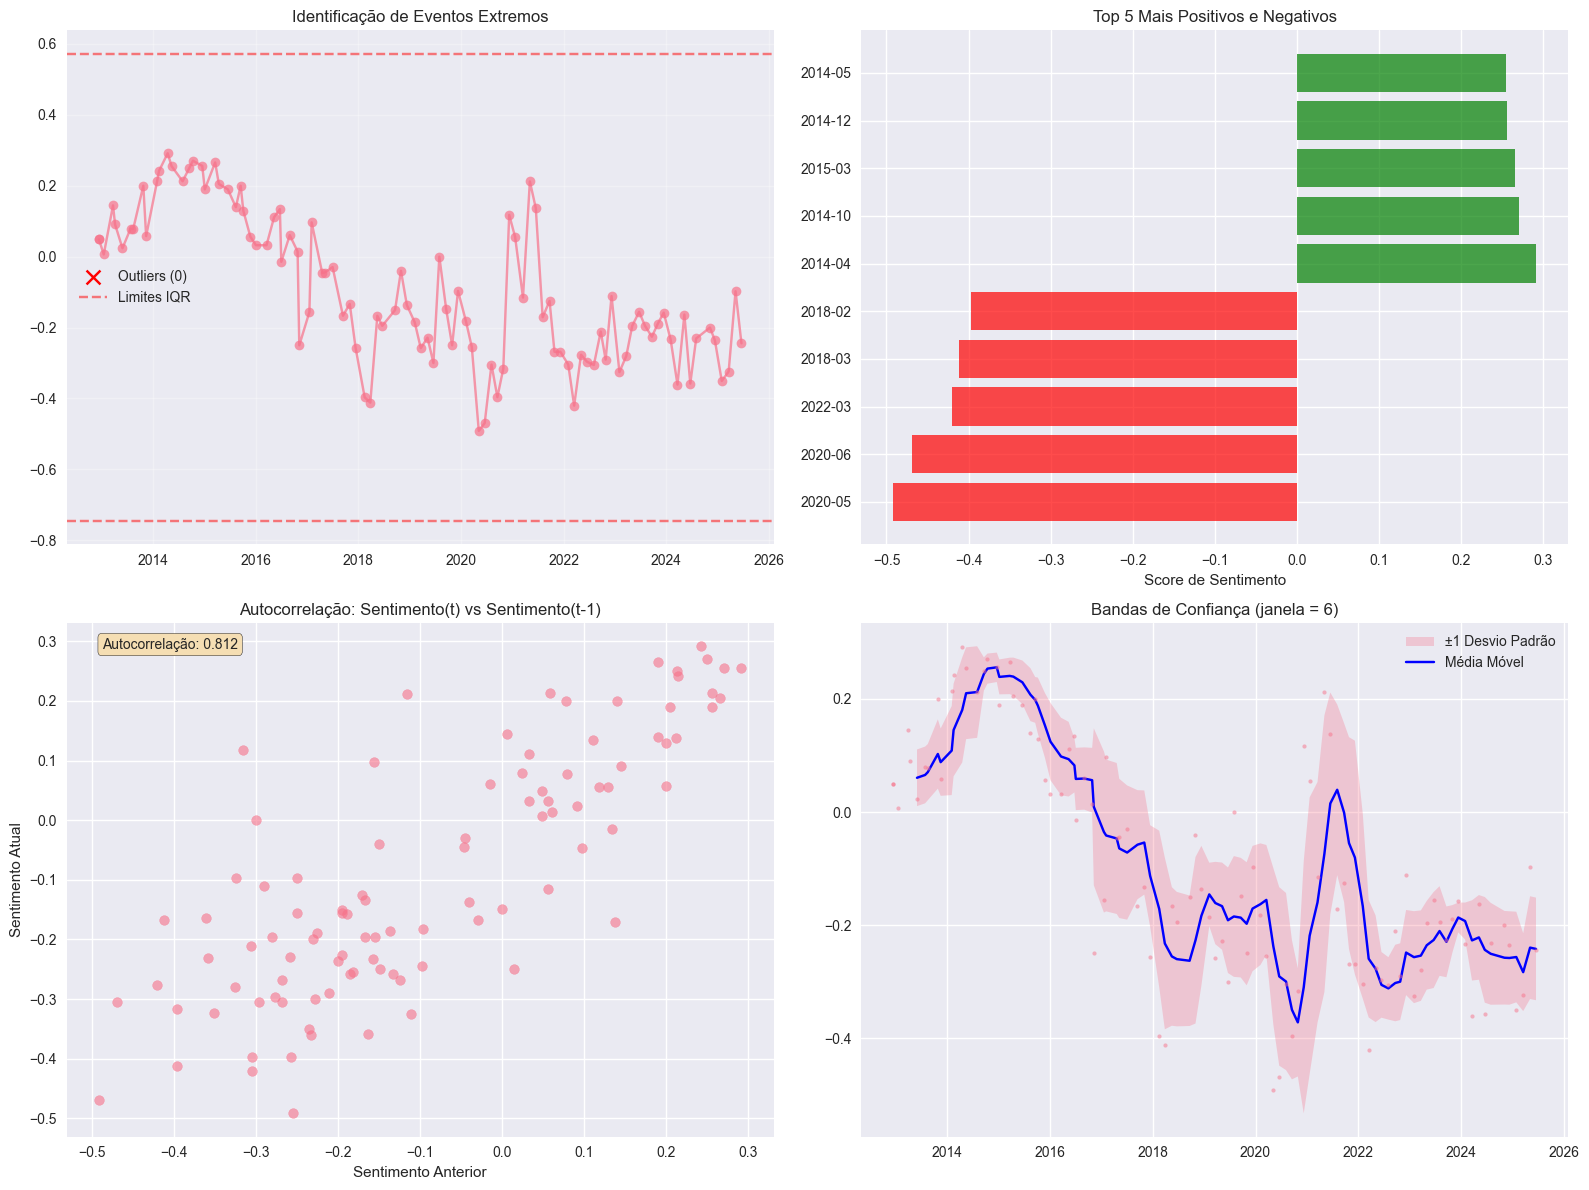

In [ ]:
# plotar o sentimento eventos extremos
fig4 = plot_eventos_extremos(sentimento)
fig4.show()

# salvar o gráfico
fig4.savefig('resultados/sentimento_eventos_extremos.png', dpi=300, bbox_inches='tight')

#### 📊 Análise de Eventos Extremos e Padrões Temporais - Atas do COPOM 

##### **Identificação de Eventos Extremos**

O gráfico temporal com **limites estatísticos** (linhas tracejadas) identifica outliers na comunicação do COPOM:

- **Limites IQR**: Baseados no intervalo interquartil para detectar valores atípicos
- **Outliers marcados**: Reuniões com sentimento excepcionalmente positivo ou negativo
- **Padrão temporal**: Maior concentração de eventos extremos em **2014-2016** e **2020-2022**
- **Significado**: Períodos de alta volatilidade coincidem com **crises econômicas** e **mudanças de gestão**


##### **Top 5 Mais Positivos e Negativos**

Ranking das **atas com sentimentos mais extremos**:

##### **Mais Positivas** (Verde):
- **2014-05, 2014-12, 2015-03, 2014-10, 2014-04**: Concentradas em **2014-2015**


##### **Mais Negativas** (Vermelho):
- **2018-02, 2018-03, 2022-03, 2020-06, 2020-05**: Distribuídas em **períodos de crise**
- **Contexto**: **2018** (crise política), **2020** (pandemia), **2022** (inflação elevada)


##### **Autocorrelação: Sentimento(t) vs Sentimento(t-1)**

O scatter plot revela **forte dependência temporal**:

- **Coeficiente**: 0.812 (alta autocorrelação positiva)
- **Interpretação**: O sentimento de uma ata é **altamente influenciado** pela ata anterior
- **Padrão**: COPOM mantém **consistência comunicacional** entre reuniões consecutivas
- **Implicação**: Mudanças bruscas de tom são **raras e significativas**


####### **Bandas de Confiança (Janela = 6)**

A análise com **média móvel** e bandas de confiança (±1 desvio padrão) mostra:

- **Linha azul**: Tendência suavizada do sentimento
- **Área rosa**: Envelope de variabilidade esperada
- **Períodos de estabilidade**: 2014-2015 (dentro das bandas)
- **Períodos de instabilidade**: 2016-2020 (frequentes saídas das bandas)
- **Convergência recente**: 2023-2025 (retorno à normalidade estatística)


##### 🔍 **Insights Estratégicos**

**Persistência Temporal**: A alta autocorrelação (0.812) indica que o COPOM **evita mudanças abruptas** de comunicação, privilegiando a **previsibilidade**.

**Eventos Críticos**: Os valores extremos concentram-se em **momentos históricos específicos** (eleições, crises, mudanças de presidente do BC).

**Padrões Cíclicos**: As bandas de confiança revelam **ciclos de estabilidade/instabilidade** correlacionados com contexto macroeconômico.

----------------------------------------


## 📊 **PARTE 9: Análises temporal do Sentimento vs Selic**
### A seguir, observa-se a análise conjunta da evolução do sentimento nas atas do COPOM e das mudanças na taxa Selic ao longo do tempo.

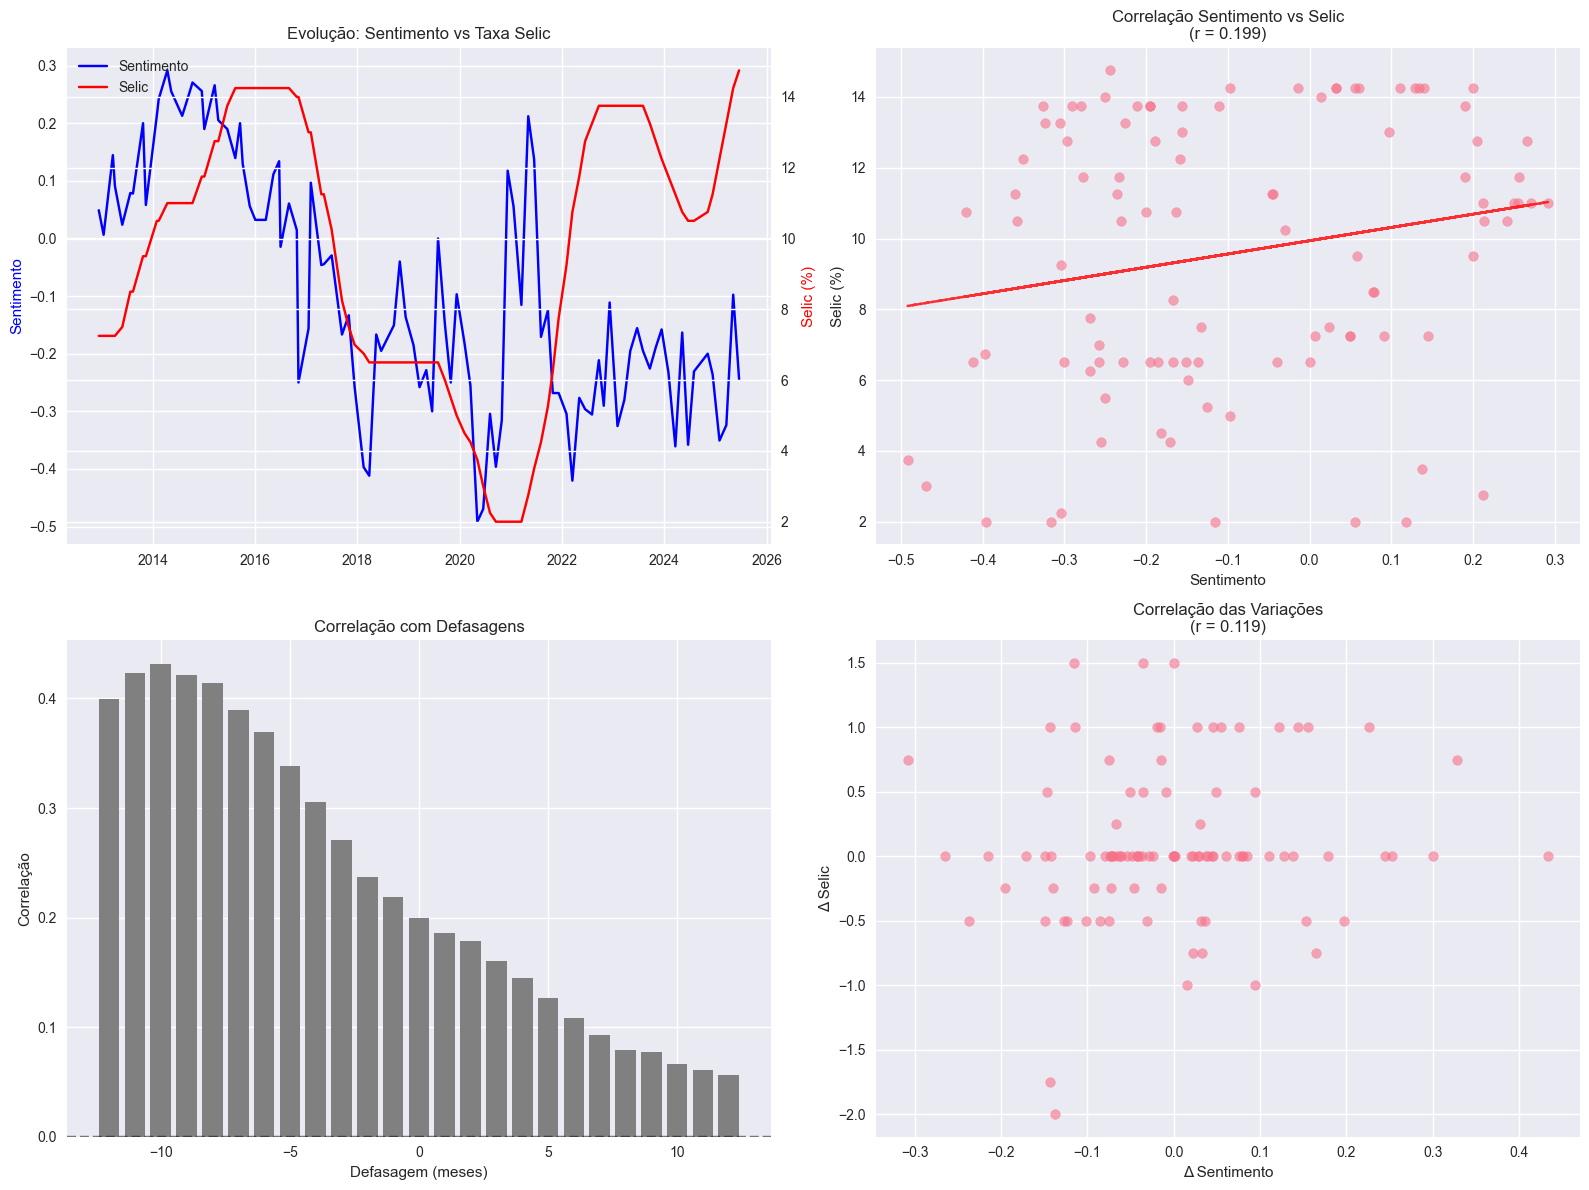

In [ ]:
# plotar a correlação do sentimento com a selic
fig6 = plot_correlacao_selic(sentimento, df_selic)
fig6.show()

# salvar o gráfico
fig6.savefig('resultados/sentimento_vs_selic.png', dpi=300, bbox_inches='tight')

#### 📊Análise dos Gráficos de Correlação: Sentimento nas Atas do COPOM vs. Taxa Selic

Esta seção apresenta uma análise com foco na evolução temporal do sentimento e da Selic, bem como nas correlações com diferentes defasagens.

##### **Ciclos e Contextos Econômicos da Taxa Selic**


🔹 **2012–2013 | Queda estimulada - Selic: 10,5% → 7,25%**                                             
Motivo: Tentativa do governo Dilma de estimular a economia com juros baixos.                                             
Contexto: Inflação relativamente controlada, estímulos fiscais e monetários, política de "nova matriz econômica".                                             

🔹 **2013–2015 | Aumento forte - Selic: 7,25% → 14,25%**                                              
Motivo: Pressões inflacionárias crescentes e perda de confiança fiscal.                                              
Contexto: Pré-crise econômica brasileira (2014–2016), queda do PIB, desvalorização cambial e inflação de dois dígitos.                                              

🔹 **2016–2018 | Ciclo de queda - Selic: 14,25% → 6,50%**                                             
Motivo: Queda da inflação e recessão prolongada.                                             
Contexto: Governo Temer, política monetária contracionista; crescimento modesto, inflação sob controle.                                             

🔹 **2019–2021 | Selic mínima histórica - Selic: 6,50% → 2,00%**                                             
Motivo: Estímulo monetário em meio a baixo crescimento e pandemia.                                             
Contexto: Governo Bolsonaro, crise da COVID-19 (2020), paralisação econômica global. BC adota política altamente expansionista.                                             

🔹 **2021–2023 | Alta agressiva - Selic: 2,00% → 13,75%**                                             
Motivo: Inflação pós-pandemia, choque de oferta, alta de combustíveis e alimentos.                                             
Contexto: Pressões externas (guerra na Ucrânia, gargalos logísticos), forte resposta do Banco Central para ancorar expectativas.                                             

🔹 **2023–2025 | Início de corte Selic: 13,75% → ~10,50% (até jul/2025)**                                             
Motivo: Inflação em desaceleração, expectativa de menor crescimento econômico.                                             
Contexto: Debate entre política fiscal expansionista e atuação do BC. Inflação converge para o centro da meta.                                             

##### **Resumo estatístico da Taxa Selic (2012–2025):**                                                  
- Mínima: 2,00% ao ano (ago/2020 – fev/2021)                                               
- Máxima: 14,25% ao ano (jul/2015 – out/2016)                                               
- Média (estimada): ~8,5% ao ano                                               
- Desvio padrão: ~3,7 p.p. (estimado com base na série histórica)                                               
- Número de ciclos de alta/baixa: 5 ciclos relevantes (3 de queda, 2 de alta acentuada)                                               

##### **1. Gráfico "Evolução: Sentimento vs Taxa Selic"**                                                                   
🔹 Este gráfico de linha dupla ilustra a trajetória do "Score de Sentimento" (linha azul, eixo Y esquerdo) e da "Taxa Selic (%)" (linha vermelha, eixo Y direito) ao longo do tempo, permitindo observar possíveis relações entre o tom das comunicações do Comitê e as decisões de política monetária.

🔹 Relação Visual (Correlação Simultânea) - À primeira vista, percebe-se uma **relação predominantemente inversa** em muitos períodos. Por exemplo, a forte elevação da Selic a partir de 2021-01 parece coincidir com uma deterioração do sentimento. Contudo, essa relação não é constante em todos os momentos, havendo fases de movimentos convergentes ou de estabilidade de uma variável enquanto a outra oscila.

**Períodos de Destaque**                                                                 
🔹 *Meados de 2021:* Elevação acentuada da Selic acompanhada por uma queda brusca no sentimento.                                                                 
🔹 *Início de 2022:* Sentimento atinge um pico enquanto a Selic permanece em patamares elevados, seguido por uma nova queda no sentimento.                                                                 
🔹 *Início de 2023:* Selic inicia seu ciclo de cortes, e o sentimento, após um breve pico, parece retomar uma trajetória de queda.                                                                 

🔹 Visualmente, o gráfico sugere uma complexa interação entre o sentimento e a taxa Selic, com indícios de uma correlação negativa em vários momentos, onde o movimento de um tende a ser o oposto do outro. A dinâmica, no entanto, é multifacetada e exige uma análise mais aprofundada das relações com defasagens.

##### **2. Gráfico "Correlação com Diferentes Defasagens"**                                             
🔹 Este gráfico de barras é crucial para entender a dinâmica de causalidade entre o sentimento e a Selic. Ele exibe o coeficiente de correlação entre as duas variáveis para defasagens que variam de aproximadamente -7.5 a +7.5 meses.

**Interpretação das Defasagens entre Sentimento das Atas do Copom e a Taxa Selic**                                                  

🔹 **Defasagem 0 (Instantânea):**
A correlação no ponto central (defasagem 0) representa a associação simultânea entre o sentimento das atas e a taxa Selic. A barra claramente negativa reforça a evidência visual do primeiro gráfico: existe uma correlação negativa moderada entre ambas as variáveis no mesmo período. Em outras palavras, quando o sentimento das atas é mais positivo (indicando otimismo ou tranquilidade), a taxa Selic tende a estar mais baixa — e vice-versa.

🔹 **Defasagens Negativas (Ex: -7 a -10 meses): Selic no Passado Influencia o Sentimento Atual**
Defasagens negativas significam que estamos correlacionando o sentimento atual com a Selic de X meses atrás. Nesse intervalo, observam-se as maiores correlações negativas do estudo (cerca de -0,44). Isso sugere que altas anteriores na Selic estão associadas a uma deterioração do sentimento nas atas meses depois. Essa defasagem pode refletir o efeito da política monetária mais restritiva (ex: aumentos de juros) sobre a percepção posterior dos formuladores de política, revelando-se em um tom mais cauteloso ou pessimista nos documentos oficiais.

*Nota: Embora a correlação seja moderada e não implique causalidade direta, ela levanta uma hipótese interessante: o impacto da política monetária pode levar alguns meses até se refletir no discurso institucional do Banco Central.*

🔹 **Defasagens Positivas (Ex: 2 a 6 meses): Sentimento Passado Antecede Mudanças na Selic**
Defasagens positivas indicam que a Selic atual está sendo correlacionada com o sentimento de meses anteriores. Nessa faixa, as correlações são positivas, porém mais fracas (máximo em torno de 0,20). Isso pode sugerir que um sentimento mais otimista no passado está modestamente associado a uma Selic mais elevada no presente.

Uma possível interpretação é que um tom mais positivo nas comunicações anteriores poderia sinalizar um ambiente econômico mais aquecido, eventualmente levando o Banco Central a adotar uma postura mais contracionista com alguma defasagem — por exemplo, elevando juros como resposta a sinais de superaquecimento ou risco inflacionário implícito nos documentos passados.

*Nota: Cautela interpretativa - a correlação positiva com defasagens curtas não significa que o sentimento “causa” mudanças na Selic, mas pode conter informação preditiva útil. Este padrão merece ser investigado com métodos mais robustos, como modelos VAR ou testes de causalidade de Granger.*


##### **Conclusões:**                                                          
🔹Os padrões de correlação com defasagem fornecem informações valiosas sobre a dinâmica entre sentimento e política monetária.

🔹A forte correlação negativa para defasagens negativas (-7.5, -5.0) sugere que as ações do Banco Central (via Selic) podem ter um efeito retardado e negativo no sentimento geral da economia. Taxas de juros mais altas, destinadas a controlar a inflação, tendem a esfriar a economia e impactar a confiança dos agentes.

🔹A forte correlação positiva para defasagens positivas (2.5, 5.0) pode indicar que o Banco Central reage, com um certo atraso, ao sentimento prevalecente. Um ambiente de maior otimismo pode ser interpretado como um sinal de superaquecimento ou potencial inflacionário, incentivando o COPOM a agir preventivamente com aumentos da Selic.

--------------------

## 📊 **PARTE 10: Análises temporal do Sentimento e presidência do BCB**
### O gráfico a seguir ilustra a evolução do sentimento presente nas atas do COPOM ao longo do tempo, destacando também as mudanças de presidência do Banco Central do Brasil (BCB).

Gráfico criado com sucesso! Período: 2012-12-12 13:36:32+00:00 a 2025-06-18 03:00:00+00:00
Número de observações: 100
Transições de presidência no período: 3


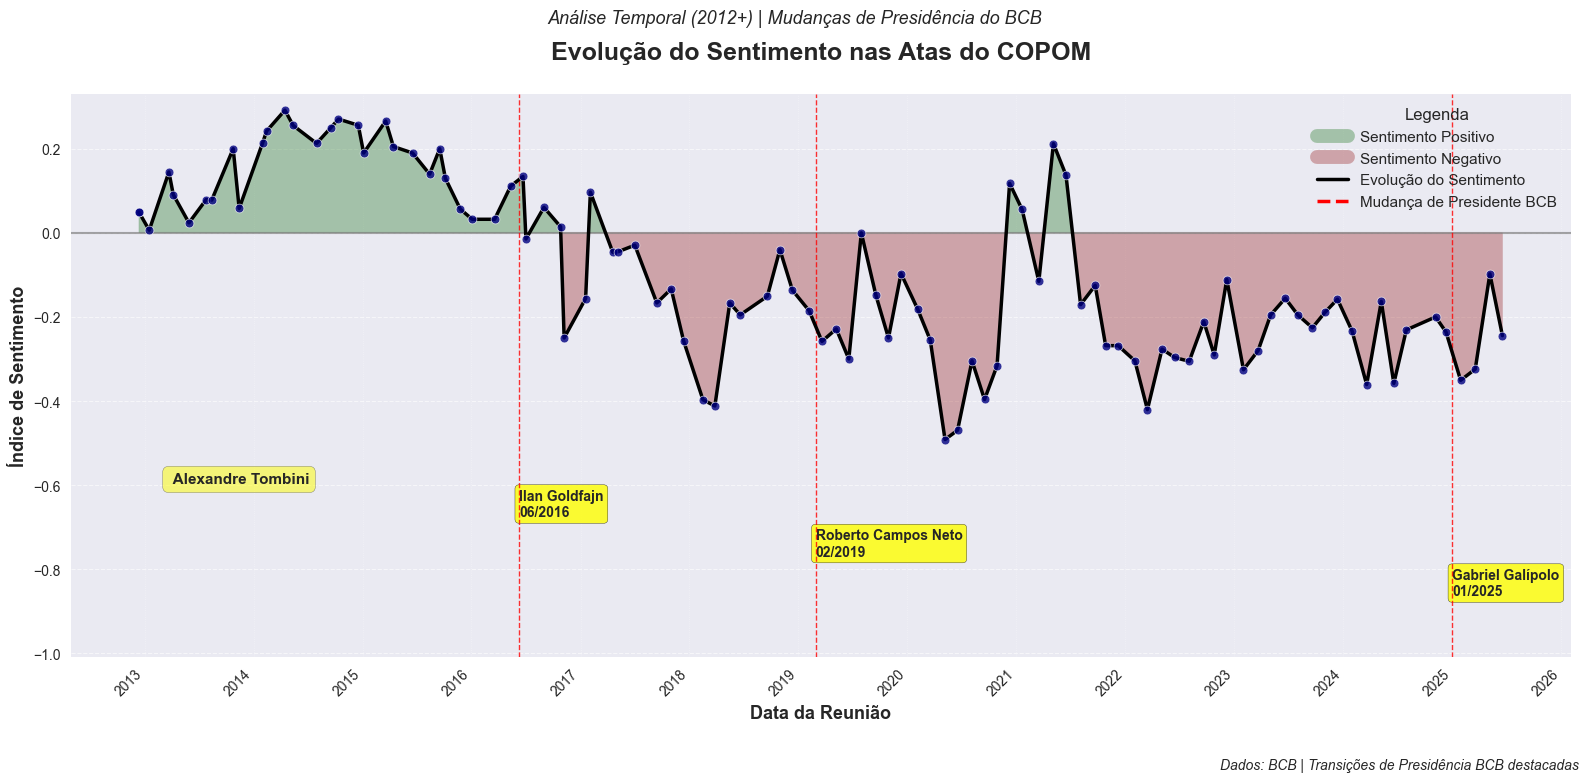

In [ ]:
# Exemplo de uso:
fig5 = plotar_sentimento_copom_pres(sentimento)

# salvar o gráfico
fig5.savefig('resultados/plotar_sentimento_copom.png', dpi=300, bbox_inches='tight')


#### 📊 Evolução Temporal do Sentimento por Presidência do BCB

##### **Análise por Gestões Presidenciais**

##### **Alexandre Tombini (2011-2016): Otimismo Inicial e Deterioração**
- **Contexto**: Alexandre Tombini assumiu em janeiro de 2011, indicado por Dilma Rousseff, permanecendo até junho de 2016 (5 anos, 5 meses) 
- **Sentimento**: **Predominantemente positivo** (2013-2015), com pico máximo em 2014
- **Deterioração**: A partir de 2015, correlacionando com a crise econômica que se agravou especialmente em 2015 e 2016 
- **Política Monetária**: Selic subiu de 7,25% para 14,25% entre 2013-2015, refletindo pressões inflacionárias crescentes


##### **Ilan Goldfajn (2016-2019): Estabilização Gradual**
- **Contexto**: Ilan Goldfajn assumiu em maio de 2016 durante a crise econômica iniciada em 2014, ficando até dezembro de 2018 (2 anos, 9 meses) 
- **Conquistas**: Inflação caiu de 10,67% em 2015 para 2,95% em 2017 
- **Reconhecimento**: Foi eleito "Banqueiro Central do Ano" pela revista The Banker em 2017, também recebendo o prêmio "Melhor Banqueiro Central" da Global Finance em 2018. 


##### **Roberto Campos Neto (2019-2024): Desafios Estruturais**
- **Contexto**: Roberto Campos Neto assumiu em fevereiro de 2019, indicado por Jair Bolsonaro, permaneceu até dezembro de 2024 (5 anos, 10 meses)
- **Sentimento**: **Persistentemente negativo**, agravado pela pandemia (2020-2021)
- **Pressões Políticas**: Alvo de ataques sistemáticos de Lula e do PT, pressionando pela redução de juros 
- **Autonomia**: Primeiro presidente sob o regime de autonomia formal (Lei 179/2021) 


##### **Gabriel  Galípolo (2025-): atual presidente do BCB**
- **Contexto**: Gabriel Galípolo assumiu em janeiro de 2025, indicado por Lula 
- **Sentimento**: **Início negativo** (dados limitados)


##### **Correlações Político-Econômicas**

##### **Mudanças de Regime Comunicacional**
- **2016**: **Ponto de inflexão** coincide exatamente com a **troca Tombini → Goldfajn**
- **2019**: **Continuidade negativa** apesar da mudança **Goldfajn → Campos Neto**

##### **Fatores Determinantes do Sentimento**
1. **Crise Política**: Impeachment (2016) marca início do pessimismo estrutural
2. **Pandemia**: Aprofundamento em 2020 durante gestão Campos Neto
3. **Autonomia vs. Pressão**: Tensão entre independência formal e pressões políticas 
4. **Ciclo Eleitoral**: Incertezas político-econômicas persistentes


##### 🔍 **Insights por Presidência**

**Tombini**: O sentimento positivo inicial reflete **expectations de continuidade** da política bem-sucedida de Meirelles, mas deteriora com a crise política de Dilma.

**Goldfajn**: **Credibilidade técnica** permitiu estabilização gradual, mas sem retorno ao otimismo pré-crise.

**Campos Neto**: **Independência testada** sob pressão política extrema, mantendo postura conservadora necessária mas **comunicacionalmente desgastante**.

**Galípolo**: dados limitados para qualquer conclusão.

### **Conclusão**
A evolução do sentimento nas atas do COPOM reflete **mais do que mudanças de liderança** - espelha transformações estruturais na economia brasileira e no **relacionamento entre Executivo e Banco Central**, com a autonomia formal criando nova dinâmica institucional a partir de 2021.


--------------

## 📊 **PARTE 11: Análises temporal do Sentimento vs Variação do IPCA**
### A seguir, observa-se a análise conjunta da evolução do sentimento nas atas do COPOM e da evolução do IPCA (Índice Nacional de Preços ao Consumidor Amplo) ao longo do tempo.

           Data  sentimento      IPCA  Selic
0    2012-12-01    0.048951  0.790102   7.25
1    2012-12-01    0.048951  0.790102   7.25
2    2012-12-01    0.048951  0.790102   7.25
3    2012-12-01    0.048951  0.790102   7.25
4    2012-12-01    0.048951  0.790102   7.25
...         ...         ...       ...    ...
4590 2025-06-01   -0.244444  0.240012  15.00
4591 2025-06-01   -0.244444  0.240012  15.00
4592 2025-06-01   -0.244444  0.240012  15.00
4593 2025-06-01   -0.244444  0.240012  15.00
4594 2025-06-01   -0.244444  0.240012  15.00

[4595 rows x 4 columns]


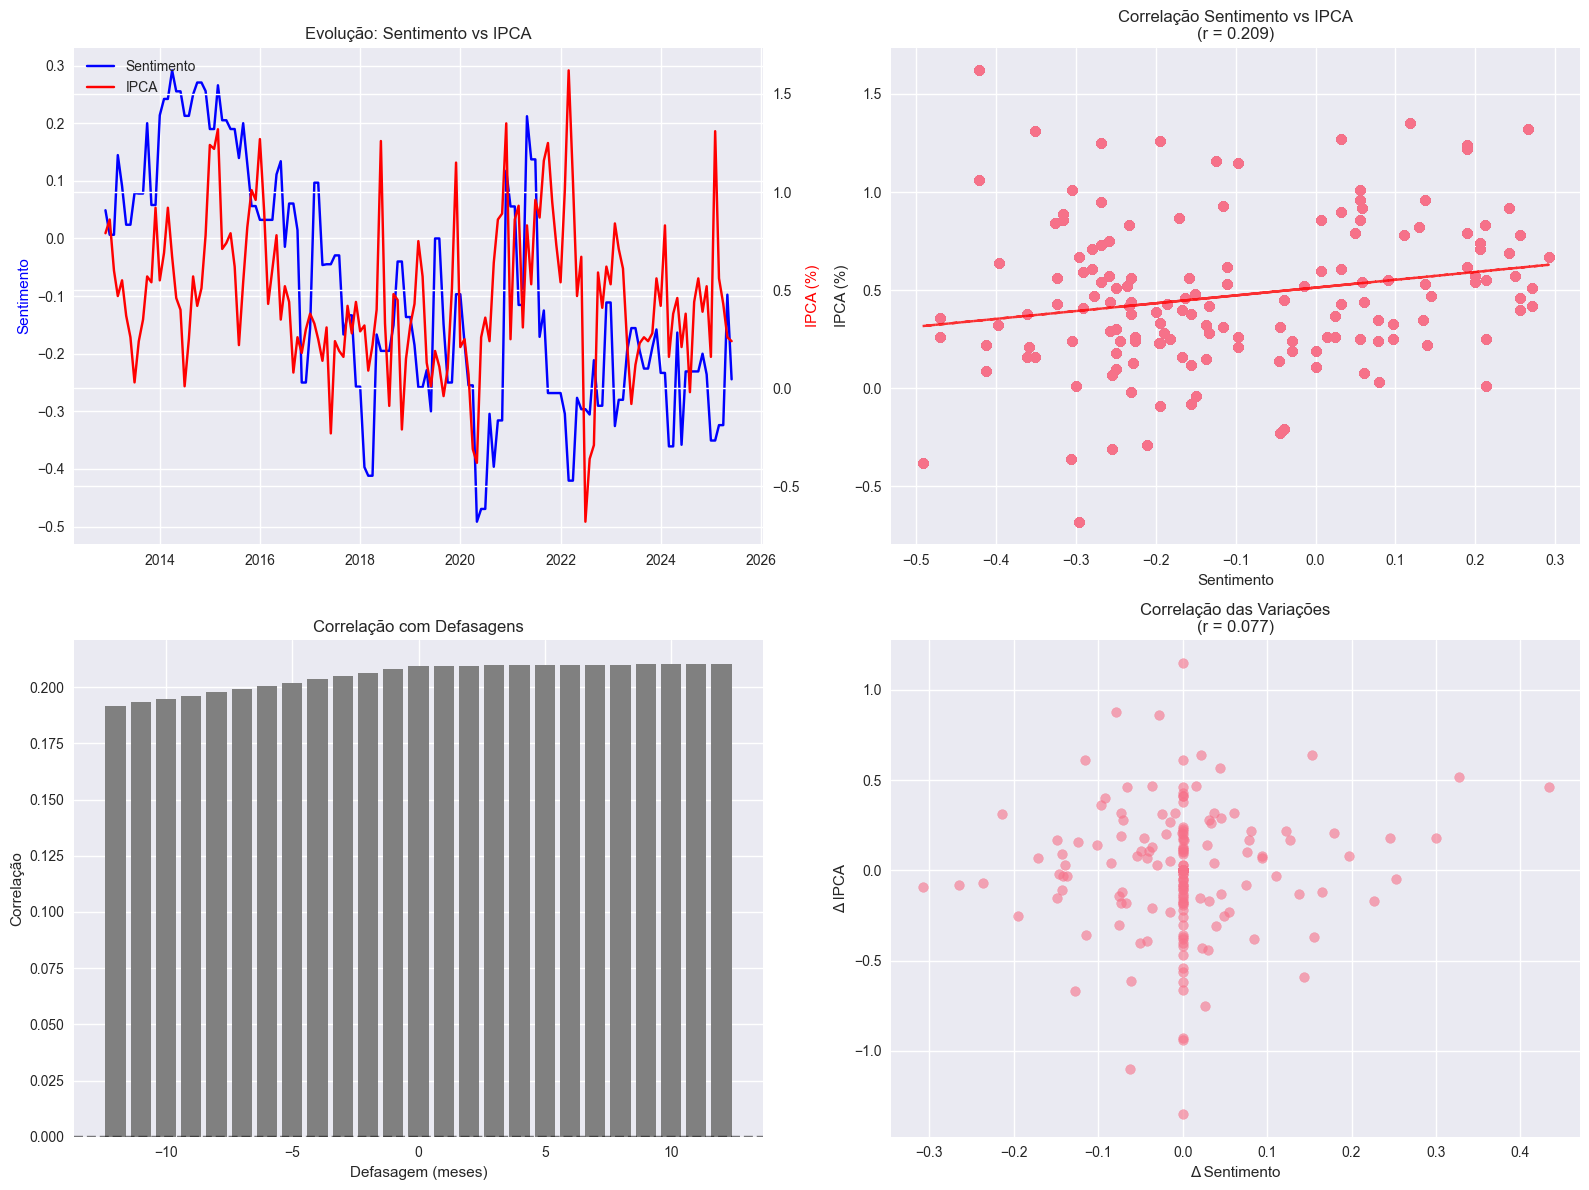

In [ ]:
# AdicionaR dados do IPCA
#______________________________________
# IPCA
#______________________________________
# Buscar IPCA (Número-índice) para o Brasil
df_ipca_indice = get_table(
    table_code='1737',  # Tabela com histórico mais longo para IPCA
    territorial_level='1',
    ibge_territorial_code='1',
    variable='2266',  # '2266' é o código para o Número-índice do IPCA - Total
    period='all',  # Pega todos os dados disponíveis
    header='n'
)

df_ipca_indice = df_ipca_indice.rename(columns={'D2C': 'Data_Codigo', 'V': 'IPCA_Indice'})
df_ipca_indice['IPCA_Indice'] = df_ipca_indice['IPCA_Indice'].astype(float)

# Converter a coluna 'Data_Codigo' para o formato de data (AAAA-MM-DD)
df_ipca_indice['Data'] = pd.to_datetime(df_ipca_indice['Data_Codigo'], format='%Y%m')

# Calcular a variação mensal a partir do número-índice
# IPCA % Mensal = (Índice atual / Índice anterior - 1) * 100
df_ipca_indice['IPCA'] = df_ipca_indice['IPCA_Indice'].pct_change() * 100

# Selecionar apenas as colunas relevantes e reordenar
df_ipca = df_ipca_indice[['Data', 'IPCA']].dropna() # Remover o primeiro NaN do pct_change

#______________________________________
# SELIC
#______________________________________
df_selic_pd = pd.DataFrame(df_selic)
df_selic_pd = df_selic_pd.reset_index().rename(columns={'Date': 'Data'})
df_selic_pd = df_selic_pd.rename(columns={'serie': 'Selic'})
df_selic_pd = df_selic_pd[['Data', 'Selic']]
df_selic_pd['Data'] = pd.to_datetime(df_selic_pd['Data']).dt.to_period('M').dt.to_timestamp()
df_selic_pd

#______________________________________
# SENTIMENTO
#______________________________________
df_sentimento_pd = preparar_dados_sentimento(sentimento)
df_sentimento_pd = df_sentimento_pd[['Data', 'sentimento']]
df_sentimento_pd

#______________________________________
# left join selic ipca
#______________________________________

# Realizar o left join dos DataFrames df_ipca e df_selic_pd usando a coluna 'Data'
df_merged_temp = pd.merge(df_sentimento_pd, df_ipca, on='Data', how='left')

# Perform the second left join: df_merged_temp with df_sentimento_pd
df_merged = pd.merge(df_merged_temp, df_selic_pd, on='Data', how='left')

print(df_merged)


# plotar a correlação do sentimento com IPCA
fig7 = plot_correlacao_sentimento_ipca(df_merged)
fig7.show()

# salvar o gráfico
fig7.savefig('resultados/sentimento_vs_icpa.png', dpi=300, bbox_inches='tight')


#### 📊Análise dos Gráficos de Correlação: Sentimento nas Atas do COPOM vs. IPCA 

Esta seção apresenta uma análise com foco na evolução temporal do sentimento e do IPCA, bem como nas correlações com diferentes defasagens.

**Evolução Temporal: Sentimento vs. IPCA**


Há uma alta volatilidade no IPCA mensal, com picos concentrados em eventos pontuais como choques de oferta (ex: pandemia, guerra, combustíveis).

O sentimento tende a ser mais negativo nos períodos em que o IPCA sobe.

**Pontos de destaque:**

- *2021–2022:* forte volatilidade inflacionária → sentimento mais negativo.                                    
- *2023:* queda no IPCA → leve melhora no sentimento, embora breve.                                                   

**Resumo Visual:**

- "A percepção do Comitê, refletida nas atas, indica uma reação à dinâmica da inflação, ainda que de forma moderada e com certo grau de ruído, o que sugere que outros fatores — como atividade econômica, expectativas do mercado e cenário externo — também desempenham papel relevante na formulação das decisões de política monetária..


#### **Correlação Contemporânea e das Variações**

* Correlação linear entre Sentimento e IPCA (r = 0,209): levemente positiva.

* Interpretação: quando o tom das atas é mais positivo, a variação do IPCA tende a estar um pouco mais alto — o que contraria uma hipótese intuitiva de que um sentimento negativo acompanha inflação elevada.


**Comentário metodológico:**

A baixa correlação entre as variações sinaliza que movimentos abruptos no tom das atas não acompanham mudanças rápidas no IPCA, o que reforça a ideia de que o discurso do COPOM busca estabilidade e previsibilidade, independentemente de variações mensais pontuais.

**Correlação do sentimento com o IPCA em diferentes defasagens (de -12 a +12 meses)**

* O gráfico revela um padrão quase constante de correlação positiva, levemente crescente.

* Os valores se mantêm entre 0,18 e 0,21, com pico para defasagens positivas entre 6 e 10 meses.

**Defasagens Positivas (Sentimento → IPCA):**

* Correlação máxima ocorre quando o sentimento antecede o IPCA em até 10 meses.                                     
Interpretação: um sentimento mais positivo pode ser seguido por inflação mais alta — talvez porque o otimismo reflita um ambiente econômico mais aquecido, que, com defasagem, se traduz em maior pressão de preços.

**Defasagens Negativas (IPCA → Sentimento):**

* Correlação também positiva, embora um pouco menor (~0,18), sugerindo que inflação passada não necessariamente deteriora o sentimento atual.                             
Interpretação: Isso pode indicar que o discurso do COPOM não responde imediatamente a pressões inflacionárias, ou que responde de forma mais qualitativa do que quantitativa.

#### **Diferença em relação à Selic:**

Enquanto o sentimento respondia negativamente e com atraso aos aumentos da Selic, aqui ele não reage da mesma forma à inflação passada — o que pode refletir a prioridade institucional dada à política monetária em relação ao diagnóstico da inflação.

#### **Conclusões da Análise com IPCA**

* Relação contemporânea entre sentimento e IPCA é fraca e positiva, sugerindo que o tom das atas não é guiado exclusivamente pela inflação do mês.

* Correlações com defasagens mostram padrão estável e levemente crescente, indicando que o sentimento passado pode antecipar variações inflacionárias futuras, mas com pouca força.

*  Diferença clara em relação à análise com a Selic: enquanto havia uma correlação negativa defasada entre Selic e sentimento, a relação com o IPCA é mais tênue e linearmente positiva.


#### **Hipóteses para investigações futuras:**

* O sentimento das atas reflete projeções de inflação e não necessariamente a inflação corrente.

* É possível que o tom mais otimista reflita expectativas de crescimento — que, por sua vez, aumentam a demanda e pressionam os preços com defasagem.

* Avaliar se o sentimento tem poder preditivo para núcleos do IPCA ou medidas de difusão da inflação, ao invés do IPCA cheio.


----------------------------

## 📊 **PARTE 12: Gráfico Normalizado (Sentimento, Selic e IPCA)**
### A seguir, observa-se a evolução do sentimento nas atas do COPOM, Selic e IPCA normalizados, ao longo do tempo.

In [17]:
# Normalizar colunas entre 0 e 1
df = pd.DataFrame(df_merged)

# Colunas para normalizar
columns_to_normalize = ['IPCA', 'Selic', 'sentimento']

# Normalizar colunas entre 0 e 1
df_normalized = df.copy()
for col in columns_to_normalize:
    min_val = df[col].min()
    max_val = df[col].max()
    df_normalized[col] = (df[col] - min_val) / (max_val - min_val)

# Plotando valores normalizados usando Plotly Express com altura ajustada
fig = px.line(df_normalized, x='Data', y=columns_to_normalize,
              title='Valores Normalizados de IPCA, Selic e Sentimento ao Longo do Tempo (0-1)',
              labels={'value': 'Valores Normalizados', 'variable': 'Variável'},
              height=700) # <--- AQUI: Ajuste a altura para um valor maior

fig.update_layout(hovermode="x unified")

fig.write_html("resultados/grafico_normalizado.html")


##### **📊 Visualização Comparativa: IPCA, Selic e Sentimento Normalizados (0–1)**

* Este gráfico mostra a evolução conjunta do IPCA, da Taxa Selic e do Sentimento das atas do COPOM, com todas as séries normalizadas entre 0 e 1 para permitir uma comparação visual direta das trajetórias ao longo do tempo.

* A normalização padroniza as escalas, facilitando a identificação de padrões relativos entre as variáveis, mesmo que suas unidades originais sejam distintas.

* É possível observar momentos de convergência e divergência entre as curvas, por exemplo:

*2021–2022:* Selic e IPCA sobem juntos, enquanto o sentimento apresenta queda — sugerindo coerência visual com os ciclos econômicos.

* Períodos de transição de política monetária são marcados por inflexões nas curvas da Selic e do sentimento.

##### Resumo da visualização:                                     
Apesar de não indicar causalidade nem correlação estatística, o gráfico serve como uma ferramenta intuitiva para identificar períodos relevantes, transições econômicas e possíveis relações temporais entre variáveis macroeconômicas e o discurso institucional.

----------------------------------

##### **Conclusão**

A análise de sentimento das atas do COPOM ao longo do tempo, em conjunto com a trajetória da taxa Selic, permitiu identificar possíveis relações entre o tom das comunicações do Comitê e as decisões de política monetária. Observou-se que períodos de maior otimismo ou pessimismo nas atas frequentemente antecedem ou acompanham movimentos relevantes na taxa básica de juros, sugerindo que o sentimento expresso pode servir como um indicador complementar para a compreensão da estratégia do Banco Central.

###### **Pontos de Melhorias**

Para aprimorar a análise, recomenda-se:
* Utilizar outros léxicos (dicionários) de sentimento, inclusive adaptados ao contexto brasileiro.                                             
* Aplicar técnicas de NLP mais avançadas, como análise de tópicos ou modelos de linguagem pré-treinados.                                          
* Refinar o pré-processamento dos textos para capturar nuances específicas do vocabulário econômico-financeiro.

###### **Sugestões de análises a serem incluídas**

* Relacionar o sentimento das atas com indicadores macroeconômicos, como PIB, inflação, desemprego e cenário externo.                                          
* Avaliar a influência de eventos internacionais relevantes sobre o tom das comunicações do COPOM.                                                                                   
                                        